# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# PROBLEM STATEMENT

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
Our job is to develop a model to find 

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands


Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

In [376]:
# Impoting Important Libraries

import pandas as pd # to bring data analysis tools and libraries
import numpy as np # To perform numerical/mathematical operation on array
import matplotlib.pyplot as plt # For plotting data
%matplotlib inline 
import seaborn as sns # for statistical graphics
import datetime #supplies classes to work with date and time

# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

 Let's begin with loading our dataset and naming it as 'df'

In [339]:
# Loading Bike Sharing Data

df = pd.read_csv(r'C:\Users\rankiz\Desktop\Alma Better\Capstone Project\ML-Supervised Learning Regression\Bike Sharing Demand Prediction\SeoulBikeData.csv')

## Now that data has been loaded, let's take a look at our data and it's attributes.

In [340]:
# Displaying size of the data
df.shape

(8760, 14)

In [341]:
# Displaying top 5 rows

df.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [342]:
# Displaying Bottom 5 Rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [343]:
# Taking a look at our variables
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [344]:
# Displaying Data Set Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [345]:
# Checking description for numerical variables
df.describe()

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### We have done an overview of our data. 
* We have got 14 features and  8760 rows.
* 'Rented Bike Count' is our dependent variable. 
* There are no null values in any of the column. Phewww !!
* Out of 14 Variables - 4 Variables are of Object Dtype , while 10 are of numerical Dtype.


### Let us simplify our column names -

In [346]:
df.rename({"Temperature(°C)":"Temp","Humidity(%)":"Humidity","Wind speed (m/s)":"Windspeed","Solar Radiation (MJ/m2)":"Solar Radiation", "Rainfall(mm)":"Rainfall","Snowfall (cm)":"Snowfall","Visibility (10m)":"Visibility"},axis=1,inplace=True)

### Let's make data ready for the analysation part.

### 1. Checking for Duplicates

In [347]:
# Checking for duplicates
check_dupl = df.duplicated(keep = False).any()
print(check_dupl)

False


There are no duplicate rows. We have an object type variable "Date" which represent dates. Let's do some feature engineering so that we can make good use of this date data.



### 2. Checking For Null Values

In [348]:
# Displaying Null Values

df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(�C)              0
Humidity                     0
Windspeed                    0
Visibility                   0
Dew point temperature(�C)    0
Solar Radiation              0
Rainfall                     0
Snowfall                     0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

 
### 3. Feature Engineering - "Date" Column 

In [349]:
# Let's check how many years data is taken
years_in_data = pd.to_datetime(df['Date']).dt.year.unique()
months_in_data = pd.to_datetime(df['Date']).dt.month.unique()

print(f'{months_in_data} months data for {years_in_data} years is captured in the given dataset.')


[ 1  2  3  4  5  6  7  8  9 10 11 12] months data for [2017 2018] years is captured in the given dataset.


* Two Years data - for 2017 & 2018 have been taken.

In [350]:
# Extracting Weekdays/Weekends from Date Column
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day'] = df['Date'].dt.day_name()
df['weekend']= df['day'].apply(lambda x : 1 if x == 'Saturday' or x == 'Sunday' else 0)
df.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity,Windspeed,Visibility,Dew point temperature(�C),Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,month,day,weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0


#### We have extracted months,type of day and weekdays from the Date Column , which will be useful in our EDA. So let's just drop 'Date' column.

In [351]:
# Let's drop 'Date' column
df = df.drop(['Date'],axis=1)

### b) Functioning Day
The "Functioning day" feature is unwanted as it is obvious that in non-functioning hours the "Rented Bike Count" will be zero and this information doesn't add any value .So, let us drop this column as well.

In [352]:
df = df.drop(['Functioning Day'], axis=1)

In [353]:
df.head()

,Rented Bike Count,Hour,Temperature(�C),Humidity,Windspeed,Visibility,Dew point temperature(�C),Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,month,day,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0


# EXPLORATORY DATA ANALYSIS

### Let's see distribution of each of continous and catagorical variable.

In [354]:
# Seperating Continous and catagorical variable for future usage.

cat_df= df[['Hour','Seasons','Holiday','month','day','weekend']]
num_df = df[['Rented Bike Count', 'Hour','Temperature(�C)','Humidity','Windspeed','Visibility','Dew point temperature(�C)','Solar Radiation','Rainfall','Snowfall']]

In [355]:
# Plotting distribution of each numerical variable based on their counts

''' Seperating numerical feature 

num_df = df[['Rented Bike Count','Hour', 'Temperature(�C)', 'Humidity', 'Windspeed',
       'Visibility', 'Dew point temperature(�C)', 'Solar Radiation',
       'Rainfall', 'Snowfall']] '''

''' Displaying 

for col in num_df:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show() '''

" Displaying \n\nfor col in num_df:\n    fig = plt.figure(figsize=(9, 6))\n    ax = fig.gca()\n    feature = df[col]\n    feature.hist(bins=50, ax = ax)\n    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)\n    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    \n    ax.set_title(col)\nplt.show() "

### Let's see linearity of numerical variables with dependent variable.

In [356]:
'''import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()'''

'import warnings\n\ndef fxn():\n    warnings.warn("deprecated", DeprecationWarning)\n\nwith warnings.catch_warnings():\n    warnings.simplefilter("ignore")\n    fxn()'

In [357]:
# Displaying Pairplot:

'''sns.pairplot(num_df, diag_kind='kde')
plt.show()'''

"sns.pairplot(num_df, diag_kind='kde')\nplt.show()"

### Let's see corelation between different variables

<AxesSubplot:>

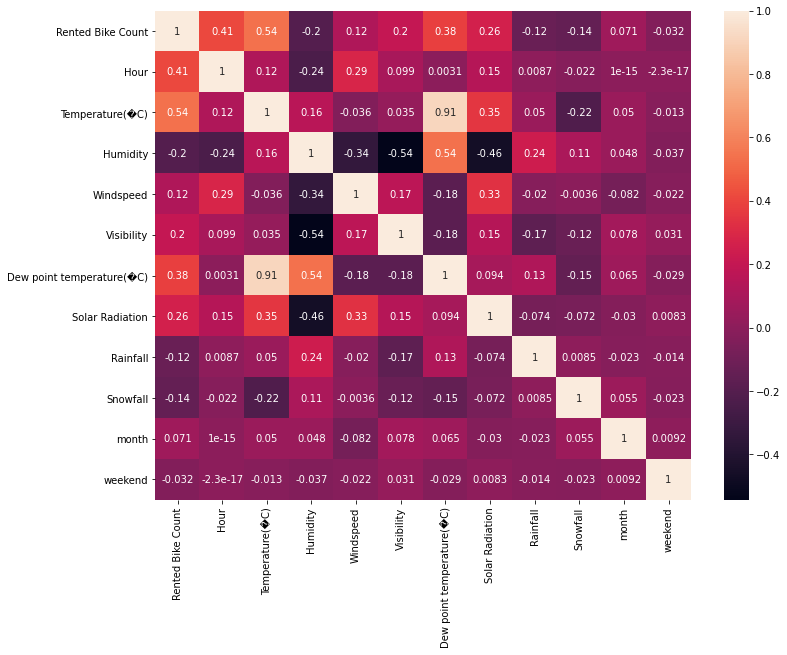

In [358]:
# Plotting Coorelation HeatMap
plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr(), annot = True)

In [359]:
df.head()

,Rented Bike Count,Hour,Temperature(�C),Humidity,Windspeed,Visibility,Dew point temperature(�C),Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,month,day,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0


In [360]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,Rented Bike Count,Hour,Temperature(�C),Humidity,Windspeed,Visibility,Dew point temperature(�C),Solar Radiation,Rainfall,Snowfall,month,weekend
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,0.070861,-0.032259
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,0.000000,-0.000000
Temperature(�C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,0.049683,-0.012972
Humidity,-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,0.047798,-0.036750
Windspeed,0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-0.082069,-0.022391
Visibility,0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,0.077888,0.030650
Dew point temperature(�C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,0.065101,-0.028966
Solar Radiation,0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-0.030412,0.008271
Rainfall,-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-0.022794,-0.014280
Snowfall,-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,0.054758,-0.022557


To know how much each variable will contribute to the result of model training, we shall remove every hint of multicollinearity. Since, variables 'Temperature' and  'Dew Point Temperature' are positively related, we shall keep only one of them.

In [361]:
# Removing Multicollinearity by dropping 'Dew Point Temperature' column
df= df.drop(['Dew point temperature(�C)'],axis =1)



## 1) Effect of Hour on Bike Sharing Demand

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

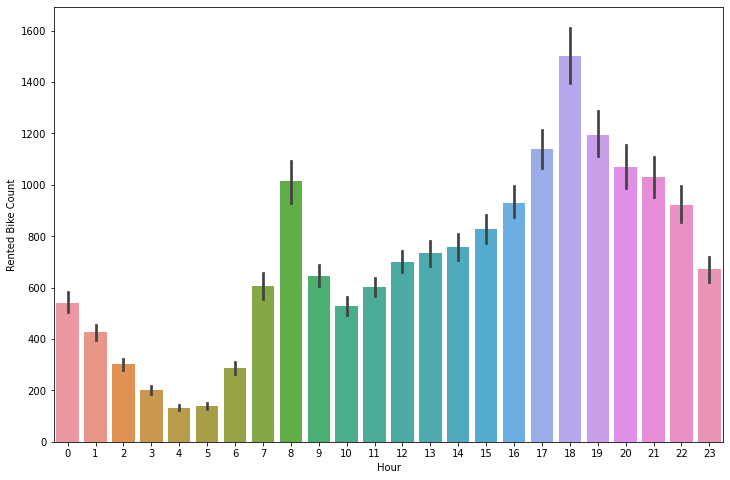

In [362]:
plt.figure(figsize = (12,8))
sns.barplot(x='Hour', y='Rented Bike Count', data = df)

<AxesSubplot:xlabel='month', ylabel='Rented Bike Count'>

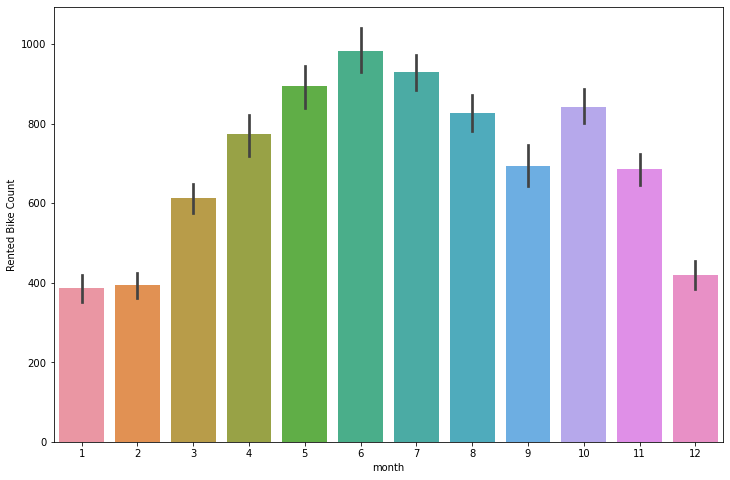

In [363]:
plt.figure(figsize = (12,8))
sns.barplot(x='month', y='Rented Bike Count', data = df)

At Evening 6pm , demand goes Maximum. Morning between 7am to 8 am and in evening between 5pm to 7pm are high demand time slots

## 2) Checking if Seasons have any impact on Bike Sharing Demand ??

  Seasons  Rented Bike Count
0  Autumn            1790002
1  Spring            1611909
2  Summer            2283234
3  Winter             487169


<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

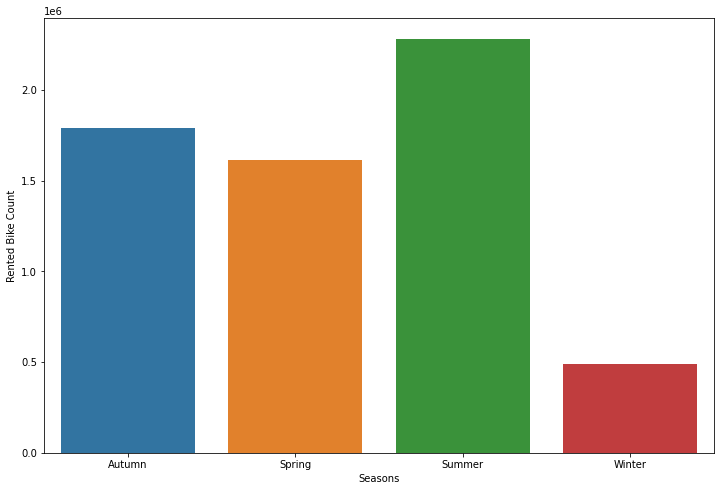

In [364]:
# Seasonal Wise Bike Sharing Demand

seasonal_affect = pd.DataFrame(df.groupby('Seasons',as_index = False)['Rented Bike Count'].sum())

print (seasonal_affect)

plt.figure(figsize = (12,8))
sns.barplot(x='Seasons', y='Rented Bike Count', data = seasonal_affect)

Well, Seasons do make impact in Bike demand. Summer season has the maximum share of demand , while Winter has lowest. 

## 4) Affect Of Weekday and Weekend !

In [365]:
weekend_affect = df.groupby('weekend', as_index = False)['Rented Bike Count'].sum()

<AxesSubplot:xlabel='weekend', ylabel='Rented Bike Count'>

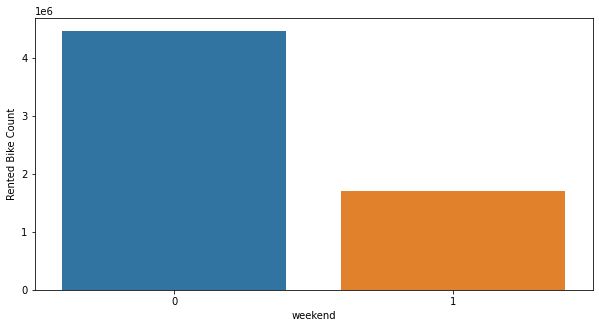

In [366]:
plt.figure(figsize=(10,5))
sns.barplot(x= 'weekend' , y='Rented Bike Count', data= weekend_affect)

Bike sharing demand is more than double on Weekdays compared to Weekends.

## 5) Effect of Temperature on Bike Sharing Demad

## 6) Effect of Humidity on Bike Sharing Demad

## 7) Effect of Windspeed on Bike Sharing Demad

## 8) Effect of Visibility on Bike Sharing Demad

## 9) Effect of Solar Radiation on Bike Sharing Demad

## 1o) Effect of Rainfall on Bike Sharing Demad

## 11) Effect of Snowfal on Bike Sharing Demad

In [367]:
df.head()

,Rented Bike Count,Hour,Temperature(�C),Humidity,Windspeed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,month,day,weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0


## Calculating Variance_Inflation_factor|

In [368]:
# Creating function for VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [369]:
# Calculating VIF
calc_vif(num_df)

,variables,VIF
0,Rented Bike Count,4.128938
1,Hour,5.043107
2,Temperature(�C),36.351729
3,Humidity,5.507031
4,Windspeed,4.806546
5,Visibility,9.104336
6,Dew point temperature(�C),17.334133
7,Solar Radiation,2.914067
8,Rainfall,1.104359
9,Snowfall,1.121057


### Finding Important Independent Variables

## Performing One Hot Encoding

In [370]:
df.head()

,Rented Bike Count,Hour,Temperature(�C),Humidity,Windspeed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,month,day,weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0


In [371]:
# Performing onehot encoder
df = pd.get_dummies(df, columns = ['Hour','month','day','Seasons', 'Holiday'])
df.head()

,Rented Bike Count,Temperature(�C),Humidity,Windspeed,Visibility,Solar Radiation,Rainfall,Snowfall,weekend,Hour_0,...,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,...,0,1,0,0,0,0,0,1,0,1
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,1,0,1


## Making variables ready to fit -

In [372]:
dependent_variable = "Rented Bike Count"
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

In [373]:
# Create the data of independent variables
X = df[independent_variables].values

# Create the dependent variable data
y = df[dependent_variable].values

In [374]:
df[independent_variables].columns

Index(['Hour_19', 'Seasons_Winter', 'weekend', 'month_6', 'day_Thursday',
       'Hour_21', 'Hour_17', 'month_5', 'Hour_11', 'day_Friday', 'month_2',
       'Seasons_Autumn', 'day_Monday', 'Hour_1', 'Snowfall', 'Hour_20',
       'Hour_3', 'month_7', 'Visibility', 'Hour_22', 'Hour_0',
       'Temperature(�C)', 'month_8', 'month_9', 'Hour_5', 'Hour_6',
       'Holiday_Holiday', 'Solar Radiation', 'Hour_10', 'Hour_18', 'Hour_4',
       'Hour_13', 'Hour_15', 'Hour_8', 'day_Tuesday', 'Hour_23', 'Hour_12',
       'month_4', 'Seasons_Summer', 'day_Saturday', 'month_11', 'Humidity',
       'Hour_16', 'Seasons_Spring', 'Holiday_No Holiday', 'Hour_14', 'Hour_9',
       'day_Wednesday', 'month_10', 'month_3', 'month_12', 'Windspeed',
       'Hour_7', 'day_Sunday', 'Hour_2', 'Rainfall', 'month_1'],
      dtype='object')

In [427]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [428]:
X_train[0:10]

array([[ 0.000e+00,  0.000e+00,  1.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  2.000e+03,  0.000e+00,
         0.000e+00,  2.390e+01,  1.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,  1.000e+00,
         0.000e+00,  5.100e+01,  0.000e+00,  0.000e+00,  1.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  9.000e-01,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e

In [429]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression

In [441]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor



In [436]:
from sklearn.metrics import accuracy_score, mean_squared_error

#Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(lr.score(X_train,y_train))
print(round(np.sqrt(mean_squared_error(y_test,y_pred)),3))

0.6195963245444545
397.447
0.6195963245444545


In [444]:
# Elastic Net
en = ElasticNetCV()
en.fit(X_train,y_train)
y_pred_en = en.predict(X_test)
print(en.score(X_train,y_train))
print(round(np.sqrt(mean_squared_error(y_test,y_pred_en)),3))

0.4059916907090103
498.682


In [445]:
# Gradient Boosting Regressor

gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)
print(gb.score(X_train,y_train))
print(round(np.sqrt(mean_squared_error(y_test,y_pred_gb)),3))

0.7782456676441984
316.121


In [439]:
#Random Forest
from sklearn.metrics import accuracy_score, mean_squared_error

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(rf.score(X_train,y_train))
print(round(np.sqrt(mean_squared_error(y_test,y_pred_rf)),3))

0.9735473475975778
271.541
0.9735473475975778


In [440]:
from sklearn.metrics import accuracy_score, mean_squared_error
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print(dt.score(X_train,y_train))
print(round(np.sqrt(mean_squared_error(y_test,y_pred_dt)),3))

1.0
407.469
1.0


In [443]:
# Fitting Multiple Linear Regression to the Training set

hb =  HuberRegressor()
hb.fit(X_train,y_train)
y_pred_hb = hb.predict(X_test)
print(hb.score(X_train,y_train))
print(round(np.sqrt(mean_squared_error(y_test,y_pred_hb)),3))

0.613796017373965
400.23


C:\Users\rankiz\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
